# Fundamentals of image processing using scikit image

- https://scikit-image.org
- Take a look at the gallery, API docs
- The underlying stack: NumPy and SciPy - https://docs.scipy.org/doc/numpy/user/quickstart.html

Before we can start using `scikit-image`, we need to understand how images are represented. For this, we will use NumPy.

# Introduction to NumPy

NumPy’s main object is the homogeneous multidimensional array. It is a table of elements (usually numbers), all of the same type, indexed by a tuple of positive integers. In NumPy dimensions are called axes.

For example, the coordinates of a point in 3D space [1, 2, 1] has one axis. That axis has 3 elements in it, so we say it has a length of 3.

In the example pictured below, the array has 2 axes. The first axis has a length of 2, the second axis has a length of 3.

```
[[ 1., 0., 0.],
 [ 0., 1., 2.]]
 ```

NumPy’s array class is called `ndarray`. The more important attributes of an ndarray object are:

- `ndarray.ndim`
the number of axes (dimensions) of the array.

- `ndarray.shape`
the dimensions of the array. This is a tuple of integers indicating the size of the array in each dimension. For a matrix with n rows and m columns, shape will be (n,m). The length of the shape tuple is therefore the number of axes, ndim.

- `ndarray.size`
the total number of elements of the array. This is equal to the product of the elements of shape.

- `ndarray.dtype`
an object describing the type of the elements in the array. One can create or specify dtype’s using standard Python types. Additionally NumPy provides types of its own. numpy.int32, numpy.int16, and numpy.float64 are some examples. 

### An example with a random array

First we import NumPy and then we can create a random 2D array and inspect some of its propteries

In [8]:
import numpy as np

In [13]:
a = np.random.random((3, 5))
print(a)
print(a.ndim)
print(a.shape)
print(a.dtype.name)
print(type(a))

[[0.64183021 0.23985137 0.68118912 0.93655431 0.63142919]
 [0.43352303 0.65346207 0.82622801 0.81123472 0.14886533]
 [0.49687863 0.8169663  0.00636133 0.06468312 0.48444685]]
2
(3, 5)
float64
<class 'numpy.ndarray'>


### Array creation

There are several ways to create arrays.

For example, you can create an array from a regular Python list or tuple using the array function. The type of the resulting array is deduced from the type of the elements in the sequences.

In [14]:
a = np.array([2,3,4])
print(a)
print(a.dtype)

[2 3 4]
int64


In [15]:
b = np.array([1.2, 3.5, 5.1])
print(b)
print(b.dtype)

[1.2 3.5 5.1]
float64


A frequent error consists in calling array with multiple numeric arguments, rather than providing a single list of numbers as an argument.

In [30]:
np.array(1,2,3,4)    # WRONG

ValueError: only 2 non-keyword arguments accepted

In [31]:
np.array([1,2,3,4])  # RIGHT

array([1, 2, 3, 4])

array transforms sequences of sequences into two-dimensional arrays, sequences of sequences of sequences into three-dimensional arrays, and so on.

In [20]:
b = np.array([(1.5,2,3), (4,5,6)])
print(b)
print(b.ndim)

[[1.5 2.  3. ]
 [4.  5.  6. ]]
2


The function zeros creates an array full of zeros, the function ones creates an array full of ones, and the function empty creates an array whose initial content is random and depends on the state of the memory. By default, the dtype of the created array is float64.

In [21]:
a = np.zeros((3, 4))
print(a)
print(a.ndim)
print(a.shape)
print(a.dtype.name)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
2
(3, 4)
float64


In [23]:
a = np.ones((2,3,4), dtype=np.int16) # dtype can also be specified
print(a)
print(a.ndim)
print(a.shape)
print(a.dtype.name)

[[[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]

 [[1 1 1 1]
  [1 1 1 1]
  [1 1 1 1]]]
3
(2, 3, 4)
int16


To create sequences of numbers, NumPy provides a function analogous to range that returns arrays instead of lists.

In [27]:
np.arange(10, 30, 5)

array([10, 15, 20, 25])

It is often better to use the function linspace that receives as an argument the number of elements that we want, instead of the step

In [26]:
np.linspace(0, 2, 9) # 9 numbers from 0 to 2

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

# Images are numpy arrays

Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.

Let's see how to build a grayscale image as a 2D array:

In [6]:
import numpy as np
from matplotlib import pyplot as plt

Make sure our plots appear inline

In [ ]:
%matplotlib inline

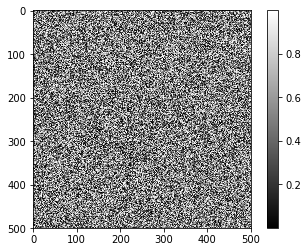

In [34]:
random_image = np.random.random([500, 500])

plt.imshow(random_image, cmap='gray')
plt.colorbar();

The same holds for "real-world" images:

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)


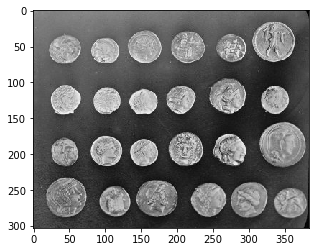

In [35]:
from skimage import data

coins = data.coins()

print('Type:', type(coins))
print('dtype:', coins.dtype)
print('shape:', coins.shape)

plt.imshow(coins, cmap='gray');

A color image is a 3D array, where the last dimension has size 3 and represents the red, green, and blue channels:

Shape: (300, 451, 3)
Values min/max: 0 231


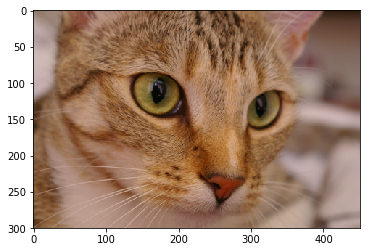

In [36]:
cat = data.chelsea()

print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat);

These are *just NumPy arrays*. E.g., we can make a red square by using standard array slicing and manipulation:

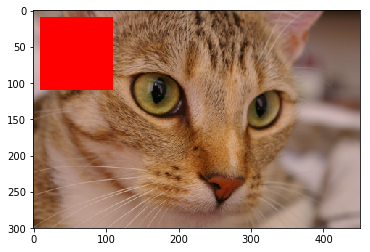

In [37]:
cat[10:110, 10:110, :] = [255, 0, 0]  # [red, green, blue]
plt.imshow(cat);

Images can also include transparent regions by adding a 4th dimension, called an *alpha layer*.

### Other shapes, and their meanings

|Image type|Coordinates|
|:---|:---|
|2D grayscale|(row, column)|
|2D multichannel|(row, column, channel)|
|3D grayscale (or volumetric) |(plane, row, column)|
|3D multichannel|(plane, row, column, channel)|

## Displaying images using matplotlib

In [38]:
from skimage import data

img0 = data.chelsea()
img1 = data.rocket()

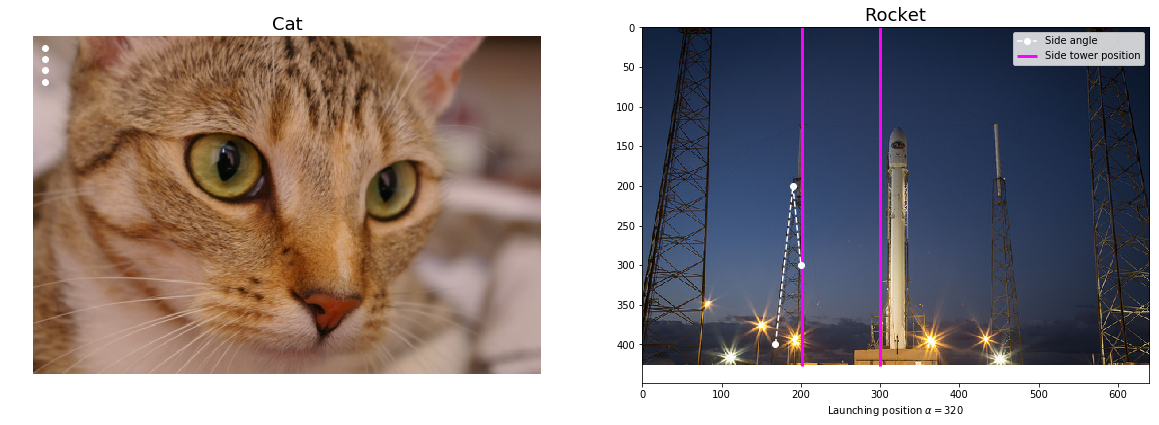

In [39]:
import matplotlib.pyplot as plt

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img0)
ax0.set_title('Cat', fontsize=18)
ax0.scatter([10, 10, 10, 10], [10, 20, 30, 40], color='white')
ax0.axis('off')

ax1.imshow(img1)
ax1.set_title('Rocket', fontsize=18)
ax1.set_xlabel(r'Launching position $\alpha=320$')

ax1.vlines([202, 300], 0, img1.shape[0], colors='magenta',
           linewidth=3, label='Side tower position')
ax1.plot([168, 190, 200], [400, 200, 300], color='white',
         linestyle='--', marker='o', label='Side angle')

ax1.legend();

For more on plotting, see the [Matplotlib documentation](https://matplotlib.org/gallery/index.html#images-contours-and-fields) and [pyplot API](https://matplotlib.org/api/pyplot_summary.html).

## Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.

E.g., here, I generate two valid images:

Linear0: float64 0.0 1.0
Linear1: uint8 0 255


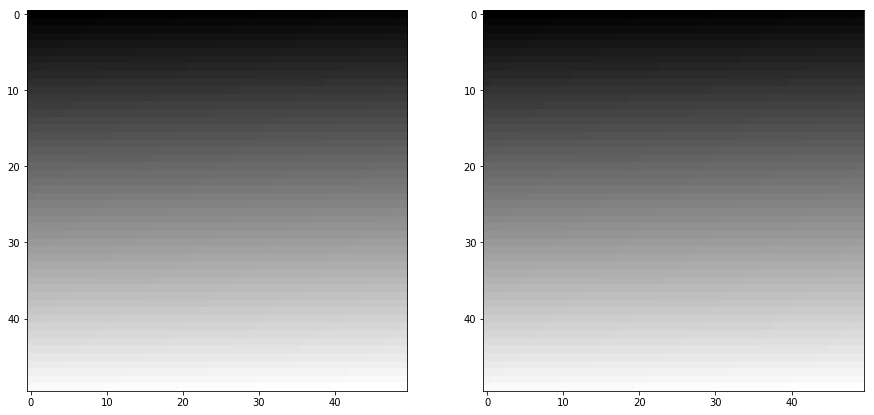

In [40]:
linear0 = np.linspace(0, 1, 2500).reshape((50, 50))
linear1 = np.linspace(0, 255, 2500).reshape((50, 50)).astype(np.uint8)

print("Linear0:", linear0.dtype, linear0.min(), linear0.max())
print("Linear1:", linear1.dtype, linear1.min(), linear1.max())

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 15))
ax0.imshow(linear0, cmap='gray')
ax1.imshow(linear1, cmap='gray');

The library is designed in such a way that any data-type is allowed as input,
as long as the range is correct (0-1 for floating point images, 0-255 for unsigned bytes,
0-65535 for unsigned 16-bit integers).

You can convert images between different representations by using ``img_as_float``, ``img_as_ubyte``, etc.:

In [41]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()

image_ubyte = img_as_ubyte(image)
image_float = img_as_float(image)

print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())
print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print()
print("231/255 =", 231/255.)

type, min, max: uint8 0 231
type, min, max: float64 0.0 0.9058823529411765

231/255 = 0.9058823529411765


Your code would then typically look like this:

```python
def my_function(any_image):
   float_image = img_as_float(any_image)
   # Proceed, knowing image is in [0, 1]
```

We recommend using the floating point representation, given that
``scikit-image`` mostly uses that format internally.

## Image I/O

Mostly, we won't be using input images from the scikit-image example data sets.  Those images are typically stored in JPEG or PNG format.  Since scikit-image operates on NumPy arrays, *any* image reader library that provides arrays will do.  Options include imageio, matplotlib, pillow, etc.

scikit-image conveniently wraps many of these in the `io` submodule, and will use whichever of the libraries mentioned above are installed:

<class 'numpy.ndarray'>
uint8
(300, 225, 3)
0 255


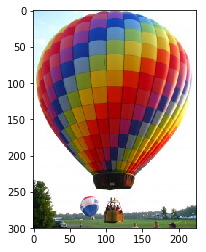

In [45]:
from skimage import io

image = io.imread('../data/balloon.jpg')

print(type(image))
print(image.dtype)
print(image.shape)
print(image.min(), image.max())

plt.imshow(image);

We also have the ability to load multiple images, or multi-layer TIFF images:

In [46]:
from skimage import data_dir

!ls $data_dir

__init__.py                       gray_morph_output.npz
__pycache__                       green_palette.png
_binary_blobs.py                  horse.png
_blobs_3d_fiji_skeleton.tif       hubble_deep_field.jpg
_detect.py                        ihc.png
astronaut.png                     lbpcascade_frontalface_opencv.xml
astronaut_GRAY_hog_L1.npy         lfw_subset.npy
astronaut_GRAY_hog_L2-Hys.npy     logo.png
block.png                         microaneurysms.png
brick.png                         moon.png
bw_text.png                       motorcycle_disp.npz
bw_text_skeleton.npy              motorcycle_left.png
camera.png                        motorcycle_right.png
checker_bilevel.png               mssim_matlab_output.npz
chelsea.png                       multi.fits
chessboard_GRAY.png               multipage.tif
chessboard_GRAY_U16.tif           multipage_rgb.tif
chessboard_GRAY_U16B.tif          no_time_for_that_tiny.gif
chessboard_GRAY_U8.npy            orb_descriptor_positions.txt
chess

In [48]:
ic = io.ImageCollection(data_dir + '/*.png')

print('Type:', type(ic))

ic.files

Type: <class 'skimage.io.collection.ImageCollection'>


['/anaconda3/lib/python3.7/site-packages/skimage/data/astronaut.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/block.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/brick.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/bw_text.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/camera.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/checker_bilevel.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/chelsea.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/chessboard_GRAY.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/chessboard_RGB.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/clock_motion.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/coffee.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/coins.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/color.png',
 '/anaconda3/lib/python3.7/site-packages/skimage/data/foo3x5x4indexed.png',
 '/anaconda3/lib/pyt

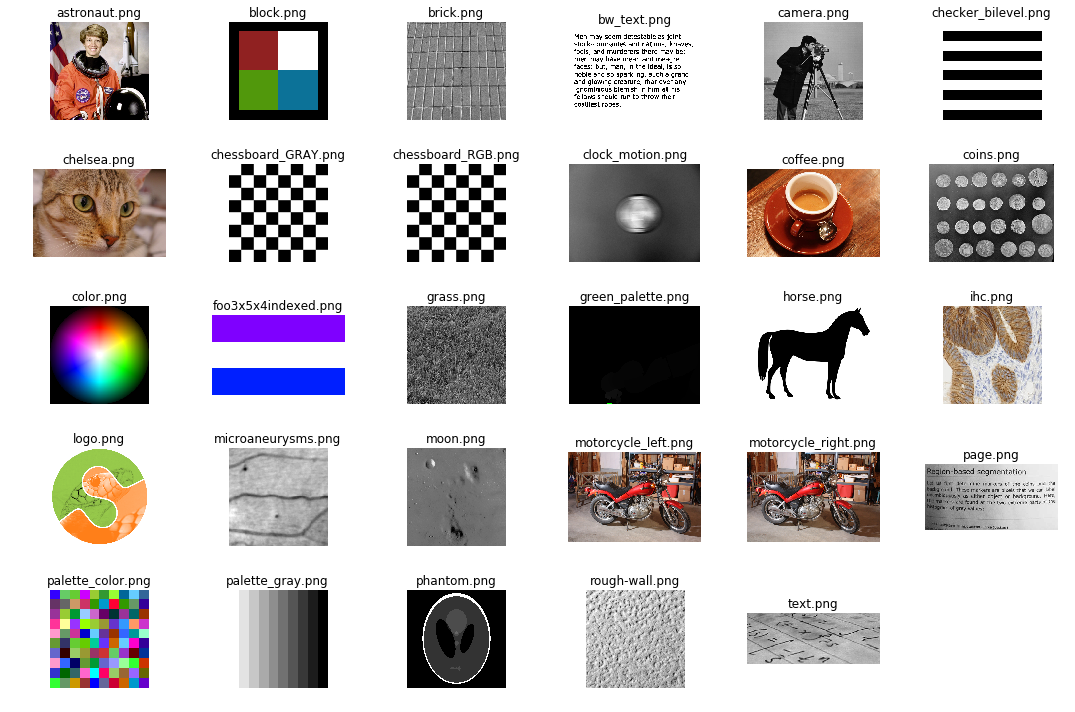

In [49]:
import os

f, axes = plt.subplots(nrows=5, ncols=len(ic) // 5 + 1, figsize=(15, 10))

# subplots returns the figure and an array of axes
# we use `axes.ravel()` to turn these into a list
axes = axes.ravel()

for ax in axes:
    ax.axis('off')

for i, image in enumerate(ic):
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(os.path.basename(ic.files[i]))
    
plt.tight_layout()

## <span class="exercize">Exercise: draw the letter H</span>

Define a function that takes as input an RGB image and a pair of coordinates (row, column), and returns a copy with a green letter H overlaid at those coordinates. The coordinates point to the top-left corner of the H.

The arms and strut of the H should have a width of 3 pixels, and the H itself should have a height of 24 pixels and width of 20 pixels.

Start with the following template:

In [ ]:
def draw_H(image, coords, color=(0, 255, 0)):
    out = image.copy()
    
    ...
    
    return out

Test your function like so:

In [ ]:
cat = data.chelsea()
cat_H = draw_H(cat, (50, -50))
plt.imshow(cat_H);

## <span class="exercize">Exercise: visualizing RGB channels</span>

Display the different color channels of the image along (each as a gray-scale image).  Start with the following template:

In [ ]:
# --- read in the image ---

image = plt.imread('data/Bells-Beach.jpg')

# --- assign each color channel to a different variable ---

r = ...
g = ...
b = ...

# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');

Now, take a look at the following R, G, and B channels.  How would their combination look? (Write some code to confirm your intuition.)

In [ ]:
from skimage import draw

red = np.zeros((300, 300))
green = np.zeros((300, 300))
blue = np.zeros((300, 300))

r, c = draw.circle(100, 100, 100)
red[r, c] = 1

r, c = draw.circle(100, 200, 100)
green[r, c] = 1

r, c = draw.circle(200, 150, 100)
blue[r, c] = 1

f, axes = plt.subplots(1, 3)
for (ax, channel) in zip(axes, [red, green, blue]):
    ax.imshow(channel, cmap='gray')
    ax.axis('off')

In [ ]:
# Hint: np.stack([...], axis=2)

## Exercise: Convert to grayscale ("black and white")

The *relative luminance* of an image is the intensity of light coming from each point. Different colors contribute differently to the luminance: it's very hard to have a bright, pure blue, for example. So, starting from an RGB image, the luminance is given by:

$$
Y = 0.2126R + 0.7152G + 0.0722B
$$

Use Python 3.5's matrix multiplication, `@`, to convert an RGB image to a grayscale luminance image according to the formula above.

Compare your results to that obtained with `skimage.color.rgb2gray`.

Change the coefficients to 1/3 (i.e., take the mean of the red, green, and blue channels, to see how that approach compares with `rgb2gray`).

In [ ]:
from skimage import color, img_as_float

image = img_as_float(io.imread('data/balloon.jpg'))

gray = color.rgb2gray(image)
my_gray = ...

# --- display the results ---

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 6))

ax0.imshow(gray, cmap='gray')
ax0.set_title('skimage.color.rgb2gray')

ax1.imshow(my_gray, cmap='gray')
ax1.set_title('my rgb2gray')

### Demo: skimage + keras

In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
net = InceptionV3()

In [3]:
from skimage import transform

def inception_predict(image):
    # Rescale image to 299x299, as required by InceptionV3
    image_prep = transform.resize(image, (299, 299, 3), mode='reflect')
    
    # Scale image values to [-1, 1], as required by InceptionV3
    image_prep = (img_as_float(image_prep) - 0.5) * 2
    
    predictions = decode_predictions(
        net.predict(image_prep[None, ...])
    )
    
    plt.imshow(image, cmap='gray')
    
    for pred in predictions[0]:
        (n, klass, prob) = pred
        print(f'{klass:>15} ({prob:.3f})')



In [ ]:
from skimage import data, img_as_float
inception_predict(data.chelsea())

In [ ]:
inception_predict(data.camera())

In [ ]:
inception_predict(data.coffee())